# Checker

It this notebook I check all methods available in `app.py`.

In [8]:
import requests
import os
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

### Classify one image.

In [9]:
response = requests.post(
        "http://0.0.0.0:8001/classify",
        files={"file": open("../ml-server/tests/images/healthy.jpeg", "rb")},
    )

In [10]:
response.json()

{'success': True,
 'message': 'Successful classification',
 'data': [{'score': 0.9927250146865845, 'label': 'healthy'},
  {'score': 0.0046948399394750595, 'label': 'early_blight'},
  {'score': 0.0025801497977226973, 'label': 'late_blight'}]}

### Classify batch.

In [11]:
import glob

In [4]:
files = [('files', open(i, 'rb')) for i in glob.glob('../ml-server/tests/images/*.jpeg')]

In [5]:
labels = [i.split('/')[1].split('.')[0] for i in glob.glob('../ml-server/tests/images/*.jpeg')]

In [6]:
response = requests.post(
        "http://0.0.0.0:8001/classify_batch",
        files=files,
    )

In [7]:
response.json()

{'success': True,
 'message': 'Successful classification',
 'data': [[{'score': 0.9927250146865845, 'label': 'healthy'},
   {'score': 0.0046948399394750595, 'label': 'early_blight'},
   {'score': 0.0025801497977226973, 'label': 'late_blight'}],
  [{'score': 0.995478093624115, 'label': 'early_blight'},
   {'score': 0.0026256421115249395, 'label': 'late_blight'},
   {'score': 0.0018961905734613538, 'label': 'healthy'}],
  [{'score': 0.9952907562255859, 'label': 'late_blight'},
   {'score': 0.002454369328916073, 'label': 'early_blight'},
   {'score': 0.0022549349814653397, 'label': 'healthy'}]]}

### Find top 5 similar images to the query.

As response we get labels and paths of most similar images to thq query (in Training folder).

In [12]:
response = requests.post(
        "http://0.0.0.0:8001/find_similar",
        files={"file": open("../ml-server/tests/images/healthy.jpeg", "rb")},
    )

In [14]:
response.json()

{'success': True,
 'message': 'Here are 5 similar images to the query',
 'data': {'paths': ['Healthy/Healthy_5.jpg',
   'Healthy/Healthy_6.jpg',
   'Healthy/Healthy_3.jpg',
   'Healthy/Healthy_8.jpg',
   'Healthy/Healthy_14.jpg'],
  'labels': [1, 1, 1, 1, 1]}}

Also we can plot query image and similar images. 

In [15]:
label_dict = {0: 'early_blight', 1: 'healthy', 2: 'late_blight'}

In [16]:
def plot_images(paths, labels):
    plt.figure(figsize=(20, 10))
    columns = 6
    for (i, path) in enumerate(paths):
        label_id = int(labels[i])
        ax = plt.subplot(len(images) // columns + 1, columns, i + 1)  
        if i == 0:
            image = Image.open(path)
            ax.set_title("Query Image\n" + "Label: {}".format(label_dict[label_id]))
        else:
            image = Image.open(os.path.join('../dataset/PLD_3_Classes_256/Training/',path))  
            ax.set_title(
                "Similar Image # " + str(i) + "\nLabel: {}".format(label_dict[label_id])
            )
        plt.imshow(np.array(image).astype("int"))
        plt.axis("off")

In [17]:
response.json()['data']['paths']

['Healthy/Healthy_5.jpg',
 'Healthy/Healthy_6.jpg',
 'Healthy/Healthy_3.jpg',
 'Healthy/Healthy_8.jpg',
 'Healthy/Healthy_14.jpg']

In [18]:
images = ["../ml-server/tests/images/healthy.jpeg"]
labels = [1]

for path, label in zip(response.json()['data']['paths'], response.json()['data']['labels']):
    images.append(path)
    labels.append(label)

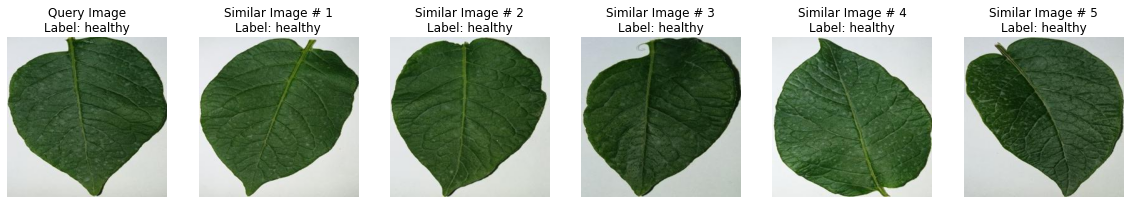

In [19]:
plot_images(images, labels)

### ChatGPT response.

We can change `late_blight` to any other label. Indeed we could classify images.

In [28]:
response = requests.post(
        "http://0.0.0.0:8001/chatgpt",
        params = {"request": "What if my potato leaf has {} disease, what should I do?".format('late_blight')},
    )

In [29]:
print(response.json()['data'])



Late blight is a serious fungal disease that affects potato plants, causing significant damage to leaves, stems, and tubers. If you suspect your potato plant has late blight disease, here are some steps you can take to manage the disease:

1. Remove infected leaves and stems: Cut off and destroy any infected leaves and stems as soon as possible. This will help to reduce the spread of the disease.

2. Use fungicides: Fungicides can be used to control the spread of the disease. Check with the local agricultural extension office for recommended fungicides.

3. Manage soil moisture: Late blight thrives in wet conditions, so make sure your potato plants are not overwatered or planted in poorly drained soils. Watering should be done in the morning, allowing the leaves to dry during the day.

4. Rotate crops: Late blight spores can survive in the soil, so rotate potato crops with non-susceptible plants such as corn or beans, to reduce the risk of infection.

5. Use disease-resistant potato 